# Clase Logit
Su uso es ser un clasificador logit, i.e. un clasificador de maxima entropia o modelo de regresion logistica


### def __init__(self, X, y, alpha=.005)
    El constructor que toma 3 argumentos:
* X es una matriz [m, n+1], m siendo las observaciones, n siendo el numero de las variables, +1 para agregar un bias term que permite hacer calculos para muestras que tienen valor de 0 (el producto punto de 0's es 0, independientemente de los parametros del modelo)
* Y es una matrix [m, 1]
* alpha es la tasa de aprendizaje

    Ademas, el constructor inicializa los parametros del modelo:
* theta, una matriz aleatoria [1, n+1]
* loss_hist, donde se guardaran los records de prediccion incorrecta

### def add_ordinate(self, X)
    Toma una matriz y le agrega una columna de unos. Esto se usa para agregar bias terms a los inputs para simplificar calculos.


### def forward(self, X=None)
    Toma una matriz opcional X y le aplica la regresion logistica/el modelo logit, calculando el resultado de 1/(1 + e^(-X * theta^T)). Si no se le manda una matriz, usa la matriz creada en el constructor.


### def loss(self)
    Calcula la entropia cruzada usando el parametro theta. Dicho de otro modo, calcula que tan preciso es el modelo, siendo 0 un modelo perfecto.


### def train(self, tol=1e-5, max_iter=10000)
    Entrena el modelo usando SGD (Stochastic Gradient Descent). Actualiza el modelo hasta que la loss/perdida sea menor al indice de tolerancia o las iteraciones hayan llegado al maximo; ademas, loss se va guardando en cada iteracion en la variable loss_hist.

Loading data: X shape [(1000, 3)]
Loading data: y shape [(1000, 1)]
params shape: theta [(1, 3)]
.
loss: 2.904951661065406
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
loss: 0.657592978127068
................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
loss: 0.4874198653220253
..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ValueError: shapes (25704,4) and (3,1) not aligned: 4 (dim 1) != 3 (dim 0)

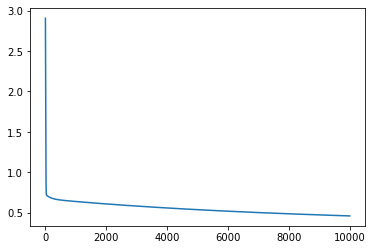

In [1]:
#! /usr/bin/env python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

    class Logit:
    '''
    This class is a logit classifier
    X in [m, n+1]
    n: variables
    m: observations
    y in [m, 1]
    theta in [1, n+1]
    np.dot(X, theta.T)

    ''' 
    def __init__(self, X, y, alpha=.005):
        self.X = self.add_ordinate(X)
        self.y = y
        self.theta = np.random.rand(X.shape[1]+1).reshape(1, -1)
        self.alpha = alpha # This is the learning rate
        self.loss_hist = []
        print(f'Loading data: X shape [{self.X.shape}]')
        print(f'Loading data: y shape [{self.y.shape}]')
        print(f'params shape: theta [{self.theta.shape}]')

    def add_ordinate(self, X):
        return np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])


    def forward(self, X=None):
        '''
        This function implements:
        the logit pass to X. 1/(1 + e-z*theta)
        '''
        X = self.add_ordinate(X) if not X is None else self.X
        #print(X.shape)
        return 1/(1 + np.exp(-np.dot(X, self.theta.T)))

    def loss(self):
        '''
        Computes cross entropy loss
        '''
        p = self.forward()
        return -np.mean(self.y*np.log(p) + (1-self.y)*np.log(1-p))

    def train(self, tol=1e-5, max_iter=10000):
        iters = 0
        loss = np.Inf
        #print(iters)
        while(loss > tol and iters < max_iter):
              print('.', end='', flush=True)
              loss = self.loss()
              if not iters % 500:
                    print(f'\nloss: {loss}')
              p = self.forward().reshape(-1, 1)
              self.theta -= -self.alpha*np.mean((self.y - p)*self.X, axis=0)
              iters += 1
              self.loss_hist.append(loss)

# Main

    El codigo main genera 2 distribuciones normales multivariadas con medias mean_1 y mean_2 y una matriz de covarianza m_cov. Despues concatena las muestras, y crea una matriz 'y' con etiquetas. Entonces, se crea una instancia de la clase Logit, y se usa el metodo train para entrenar el modelo.
    El record de loss, loss_hist, se grafica y guarda en un archivo llamado loss.png.
    Finalmente, el codigo grafica el limite de desicion, el cual indica cuales predicciones son correctas y cuales no.

In [ ]:
if __name__ == '__main__':
    mean_1 = np.array([10, 10]) #matriz de medias de la primer normal multivariada
    mean_2 = np.array([7, 7]) # lo mismo para la segunda
    m_cov = np.array([[3, 0], [0, 3]]) #matriz de covarianzas con diagonal 3 y lo demás 0
    size = 500 #tamaño de la muestra
    X = np.concatenate([np.random.multivariate_normal(size=size, mean=mean_1, cov=m_cov), #
                          np.random.multivariate_normal(size=size, mean=mean_2, cov=m_cov)],
                         axis=0)
    y = np.concatenate([np.ones(size).reshape(-1, 1), np.zeros(size).reshape(-1, 1)]) #Una matriz 1000x1 
    # Instantiate Model
    log1 = Logit(X=X, y=y)
    # Forward pass
    log1.train()
    # Loss
    plt.plot(range(len(log1.loss_hist)), log1.loss_hist)
    plt.savefig('loss.png')

    # ----------------------------------------
    # Plot curves
    # ----------------------------------------
    (x1_min, x2_min) = X.min(axis=0) - 1
    (x1_max, x2_max) = X.max(axis=0) + 1
    # Generate axis
    x1_axis = np.arange(x1_min, x1_max, step=.1)
    x2_axis = np.arange(x2_min, x2_max, step=.1)
    # Mesh grid
    x1x_, x2x_ = np.meshgrid(x1_axis, x2_axis)
    # Shape grid as features
    x1x = x1x_.flatten().reshape(-1, 1)
    x2x = x2x_.flatten().reshape(-1, 1)
    # Add bias term (vector of ones) and transpose (set into 'column' shape
    new_X = np.hstack((np.ones(x1x.shape), x1x, x2x))
    print(new_X.shape)
    # Generate predictions and shape them as grid.
    y_hat = log1.forward(new_X).reshape(x1x_.shape)
    # Generate plot
    fig, ax = plt.subplots(figsize=(10, 10))
    # Classification contour (notice that we need the grid shape)
    ax.contourf(x1x_, x2x_, y_hat)
    # Add population points
    sns.scatterplot(x='x1', y='x2', hue='class',
                  data=pd.DataFrame(np.hstack((y, X)),
                                    columns=['class', 'x1', 'x2']),
                  ax=ax)
    print('Saving classification region plot')
    fig.savefig('class_region.png')

# Muestreo.py

    El siguiente codigo preprocesa un archivo JSON que contiene texto, y entrena el modelo de regresion logistica usando una muestra de los datos preprocesados.
    
    Se usan las siguientes funciones:
    1. 'remove_words': Toma un string y le quita todas las palabras contenidas dentro de una lista de palabras pre-definidas en un archivo de texto llamado 'stopwords.txt'
    2. 'iterate_list': Toma una lista de strings y una lista de palabras, y le aplica 'remove_words'
    3. 'without_spaces': Toma una lista de strings y le quita todos los strings vacios de la lista.
    4. 'jaccard_similarity': Toma 2 strings y calcula su distancia Jaccard (la proporcion de palabras compartidas)
    5. 'words_in_string': Toma 1 string y una lista de palabras. Regresa 1 si todas las palabras en la lista se encuentran en el string, 0 si no.
    
    Se carga el archivo JSON en un dataframe de pandas, y se preprocesan los datos usando las funciones anteriormente definidas, ademas de hacer todo en minuscula.
    
    Entonces, toma una muestra de los datos preprocesados, pasandole los datos como argumentos X y 'y' a una instancia de la clase Logit.
    Despues, se grafica el limite de decisiones, que indica que predicciones fueron correctas con matplotlib, y se evalua el modelo calculando su exactitud y precision, e imprime la matriz de confusion, que indica las Falsos Positivos, Falsos Negativos, y Verdaderos Positivos y Negativos.
    

In [ ]:
#! /usr/bin/env python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import logit

def remove_words(text):
    text_words = text.split()
    text_words = [w for w in text_words if w not in words]
    text = ' '.join(text_words)
    return text

def iterate_list(my_list,words):
    result = []
    for elem in my_list:
        if type(elem) == str:
            elem = elem.replace("?"," ?")
            text_words = elem.split()
            text_words = [w for w in text_words if w not in words]
            text = ' '.join(text_words)
            result.append(text)
    return result

def without_spaces(my_list):
    new_list = [x for x in my_list if x != '']
    return new_list

def jaccard_similarity(a, b):
    a = set(a)
    b = set(b)
    j = float(len(a.intersection(b))) / len(a.union(b))
    return j

def words_in_string(words, string):
    words_list = words.split()
    for word in words_list:
        if word not in string:
            return 0
    return 1

print('\n--------------------- Preprocessing ---------------------')
df = pd.read_json('data.json')

print("\n > Todo a lowercase")

df['context'] = df['context'].apply(str.lower)
df['questions'] = df['questions'].apply(lambda x: [e.lower() if isinstance(e, str) else e for e in x])
df['ans'] = df['ans'].apply(lambda x: [e.lower() if isinstance(e, str) else e for e in x])

print(" > Elimina stopwords")

with open('stopwords.txt', 'r') as f:
    words = f.read().split()
df['context'] = df['context'].apply(remove_words)
df['questions'] = df['questions'].apply(iterate_list,words=words)
df['ans'] = df['ans'].apply(iterate_list,words=words)
df['context'] = df['context'].str.split('.')

print(" > Elimina strings vacíos")

df['context'] = df['context'].apply(without_spaces)
df_exploded = df.explode('context')
df_exploded=df_exploded.set_index(['context']).apply(pd.Series.explode).reset_index()

print(" > Calculamos jaccard_similarity")

df_exploded['jaccard_similarity'] = df_exploded.apply(lambda x: jaccard_similarity(x['context'], x['questions']), axis=1)

print(" > Revisa que la oración contenga la respuesta")

df_exploded['contains_ans'] = df_exploded.apply(lambda x: words_in_string(x['ans'], x['context']), axis=1)

print(" > Obtenemos la tabla jaccard")

cols_to_select = ["jaccard_similarity", "contains_ans"]
df_j = df_exploded.loc[:, cols_to_select]

print('\n--------------------- Model training ---------------------')
print("\n > Tomamos una muestra de 0.05")

np.random.seed(123454321)
sample_size5 = 0.05 # Sample size as a percentage of the total population
sample5 = df_j.sample(frac=sample_size5)
sample_x5 = sample5.iloc[:,0].values.reshape(-1, 1)
sample_y5 = sample5.iloc[:,-1].values.reshape(-1, 1)
log5 = logit.Logit(X=sample_x5, y=sample_y5)
print("\n > Lo entrenamos")
log5.train()
plt.plot(range(len(log5.loss_hist)), log5.loss_hist)
plt.savefig('loss_project5.png')

print("\n > Tomamos una muestra de 0.01")

np.random.seed(123454321)
sample_size1 = 0.01 # Sample size as a percentage of the total population
sample1 = df_j.sample(frac=sample_size1)
sample_x1 = sample1.iloc[:,0].values.reshape(-1, 1)
sample_y1 = sample1.iloc[:,-1].values.reshape(-1, 1)
log1 = logit.Logit(X=sample_x1, y=sample_y1)
print("\n > Lo entrenamos")
log1.train()
plt.plot(range(len(log1.loss_hist)), log1.loss_hist)
plt.savefig('loss_project1.png')